In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# to get the figures in the notebook itself
%matplotlib inline


In [2]:
#reading the training data set 
train=pd.read_csv('train_bikes.csv',parse_dates=['datetime'])

train.head(5)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

### understanding the variables

datetime: The date and timestamp when the bike was rented

season: according to https://www.kaggle.com/marklvl/bike-sharing-dataset?select=hour.csv season is divided and numerically coded as-->

1.spring
2.summer
3.fall
4.winter

holiday:whether that day was a holiday or not.Numerically coded as Not Holiday :0 and Holiday as 1

workingday:If day is neither weekend nor holiday then it is 1, otherwise is 0.  Workingday :1 Ow :0

weather: numerically coded as 
1: Clear, Few clouds, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

In [3]:
#looking at the training data from the end
train.tail()

datetime  season  holiday  workingday  weather   temp  \
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

### Non Graphical Analysis 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

1) Off the bat here, ignoring the categorical variables that are numerically coded, We can see that in variables like **temp,windspeed,casual,registered** (independent variables) The "max" point is pretty far from the 75% percentile. This can be a sign of outliers in these variables. We shall try to visualise outliers and treat them later.

2) The std dev of variables **temp,atemp,windspeed** is decent. We can infer that most of the data is centered around the mean.(Side note for myself : These variables should fairly follow normal). The variables like **casual and registered** show some high variation.This means that the data is not very centered around the mean.

3) The variable **humidity** is to be mentioned specifically is because we see the max value is 100 and the 75% percentile is 77 and the variance is not pretty high but still a significant amount and this may be caused by potiential outliers. 




### Identifying the variables

In [6]:
#numerical 

num_vars=train.iloc[:,range(5,11)]
num_vars.head()

temp   atemp  humidity  windspeed  casual  registered
0  9.84  14.395        81        0.0       3          13
1  9.02  13.635        80        0.0       8          32
2  9.02  13.635        80        0.0       5          27
3  9.84  14.395        75        0.0       3          10
4  9.84  14.395        75        0.0       0           1

In [7]:
#categorical 

cat_vars=train.iloc[:,range(1,5)]
cat_vars.head()

season  holiday  workingday  weather
0       1        0           0        1
1       1        0           0        1
2       1        0           0        1
3       1        0           0        1
4       1        0           0        1

In [8]:
#shape of the dataframe 
print("observations and Columns are :",train.shape)

observations and Columns are : (10886, 12)


In [9]:
for i in cat_vars:
    print(cat_vars[i].value_counts())

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64
1    7412
0    3474
Name: workingday, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


### Univariate Analysis

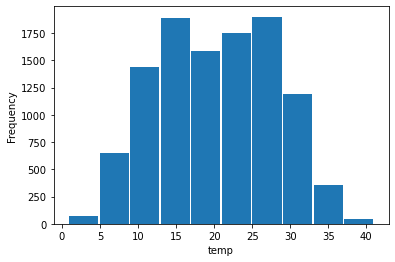

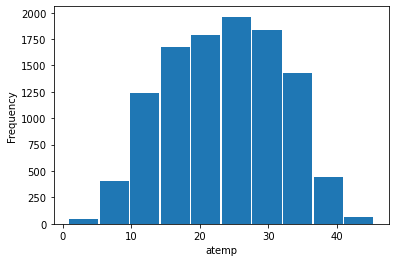

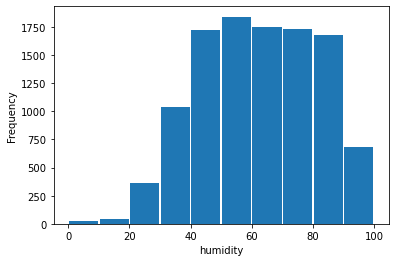

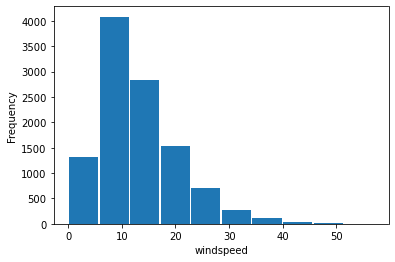

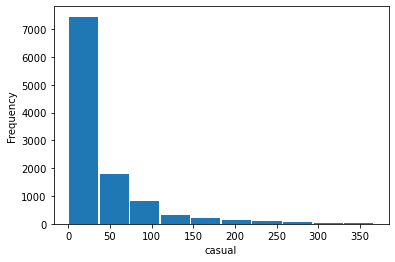

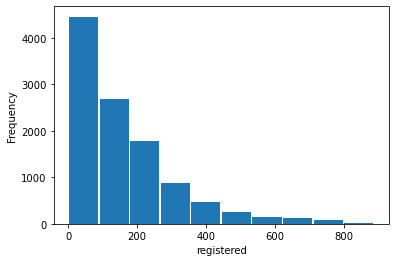

In [10]:
# plotting a histogram for numerical columns
for i in num_vars:
    ax=num_vars[i].plot.hist(rwidth=0.95)
    ax.set_xlabel(i) 
    plt.show()

From the figures above, here is the following Interpretation:
1) Variables **temp and atemp** are closer to normal variables than others 

2) There is positive skew in variables **windspeed,casual and registered**

We shall do a Shapiro wilk test to confirm for normality:

In [11]:
for i in num_vars:
    index=i
    data=num_vars[i]
    W,p=scipy.stats.shapiro(data)
    print("{0} : W = {1} p = {2}".format(index,W,p))

temp : W = 0.9804092645645142 p = 4.47221826500091e-36
atemp : W = 0.9815691709518433 p = 3.4538982852050647e-35
humidity : W = 0.9822689294815063 p = 1.245496990918048e-34
windspeed : W = 0.9587375521659851 p = 0.0
casual : W = 0.7056357264518738 p = 0.0
registered : W = 0.8562824726104736 p = 0.0


D:\ANACONDA\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Almost all the numerical variables have their p value lesser than 0.05. We can fairly conclude none of the variables are normal

### Encoding the numerical values in these variables for visualization purpose only

In [12]:
#making a copy of the data only for visualization
train_viz=pd.read_csv("train_bikes.csv",parse_dates=['datetime'])
train_viz.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [13]:
#encoding season column
season_map={1:"spring",2:"summer",3:"fall",4:"winter"}
train_viz['season']=train.season.map(season_map)
train_viz.sample(5)

datetime  season  holiday  workingday  weather   temp   atemp  \
652  2011-02-10 10:00:00  spring        0           1        1   4.92   5.305   
1534 2011-04-09 19:00:00  summer        0           0        2  15.58  19.695   
9526 2012-10-01 07:00:00  winter        0           1        1  18.04  21.970   
9857 2012-10-15 02:00:00  winter        0           1        2  23.78  27.275   
4624 2011-11-05 18:00:00  winter        0           0        1  14.76  18.180   

      humidity  windspeed  casual  registered  count  
652         42    19.9995       1          34     35  
1534        82     8.9981      47          83    130  
9526        77    11.0014      13         470    483  
9857        64    23.9994       1           5      6  
4624        50     6.0032      52         185    237

In [14]:
#encoding the holiday column
#o: not holiday 1: holiday

holiday_map={0:"not_holiday",1:"holiday"}
train_viz['holiday']=train.holiday.map(holiday_map)
train_viz.sample(5)

datetime  season      holiday  workingday  weather   temp  \
5942 2012-02-03 19:00:00  spring  not_holiday           1        1  13.94   
9028 2012-08-18 13:00:00    fall  not_holiday           0        1  30.34   
3882 2011-09-12 19:00:00    fall  not_holiday           1        1  27.88   
8158 2012-07-01 07:00:00    fall  not_holiday           0        1  30.34   
835  2011-02-18 06:00:00  spring  not_holiday           1        2  18.04   

       atemp  humidity  windspeed  casual  registered  count  
5942  17.425        49     7.0015      11         256    267  
9028  32.575        40    12.9980     289         355    644  
3882  31.820        57     8.9981      63         373    436  
8158  34.850        70     0.0000      13          37     50  
835   21.970        72    11.0014       2          48     50

In [15]:
#encoding working day 
working_map={0:"not_working",1:"working"}
train_viz['workingday']=train.workingday.map(working_map)
train_viz.sample(5)

datetime  season      holiday   workingday  weather   temp  \
4461  2011-10-17 22:00:00  winter  not_holiday      working        1  20.50   
9968  2012-10-19 17:00:00  winter  not_holiday      working        3  25.42   
8145  2012-06-19 18:00:00  summer  not_holiday      working        1  32.80   
1150  2011-03-12 14:00:00  spring  not_holiday  not_working        1  16.40   
10264 2012-11-13 02:00:00  winter  not_holiday      working        3  14.76   

        atemp  humidity  windspeed  casual  registered  count  
4461   24.240        77     0.0000      16          88    104  
9968   30.305        69    23.9994      48         377    425  
8145   37.880        55    11.0014      91         704    795  
1150   20.455        50    30.0026      70          96    166  
10264  15.910        87    30.0026       7           4     11

In [16]:
#encoding weather
#weather: numerically coded as 1: Clear, Few clouds, Partly cloudy 
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

weather_map={1:"Clear_Few/partlycloudy",2:"Mist_Cloudy/BrokenClouds/FewClouds",3:"light_snow/rain/thunderstorm/scatteredclouds",4:"heavy_rain/snow/icepellets/thunderstorm/smoke/fog"}
train_viz['weather']=train.weather.map(weather_map)
train_viz.sample(10)


datetime  season      holiday   workingday  \
4989  2011-12-01 23:00:00  winter  not_holiday      working   
9408  2012-09-15 09:00:00    fall  not_holiday  not_working   
1483  2011-04-07 16:00:00  summer  not_holiday      working   
10683 2012-12-11 13:00:00  winter  not_holiday      working   
7059  2012-04-12 12:00:00  summer  not_holiday      working   
9153  2012-09-04 18:00:00    fall  not_holiday      working   
6525  2012-03-09 03:00:00  spring  not_holiday      working   
3118  2011-07-18 20:00:00    fall  not_holiday      working   
145   2011-01-07 08:00:00  spring  not_holiday      working   
50    2011-01-03 05:00:00  spring  not_holiday      working   

                                  weather   temp   atemp  humidity  windspeed  \
4989               Clear_Few/partlycloudy  10.66  14.395        70     6.0032   
9408               Clear_Few/partlycloudy  24.60  31.060        43    27.9993   
1483               Clear_Few/partlycloudy  24.60  31.060        35     0.0000   
10683  Mist_Cloudy/BrokenClouds/FewClouds  15.58  19.695        50    15.0013   
7059               Clear_Few/partlycloudy  18.86  22.725        41    30.0026   
9153               Clear_Few/partlycloudy  31.16  37.120        75    15.0013   
6525               Clear_Few/partlycloudy  18.86  22.725        77    35.0008   
3118               Clear_Few/partlycloudy  31.98  37.120        59    15.0013   
145                Clear_Few/partlycloudy   8.20   9.850        51    16.9979   
50                 Clear_Few/partlycloudy   6.56   6.820        47    19.0012   

       casual  registered  count  
4989        3          70     73  
9408       79         263    342  
1483       52         161    213  
10683      28         226    254  
7059       60         199    259  
9153       94         745    839  
6525        0           7      7  
3118       91         232    323  
145        20         190    210  
50          0           3      3

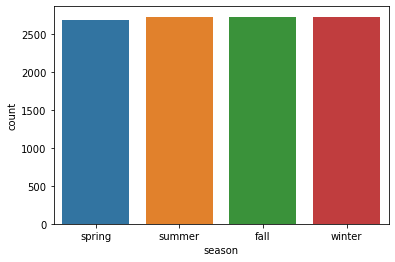

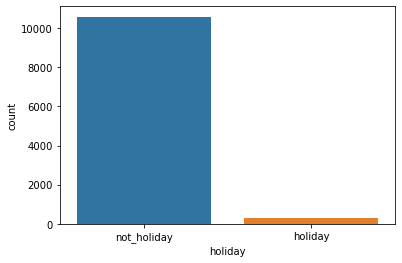

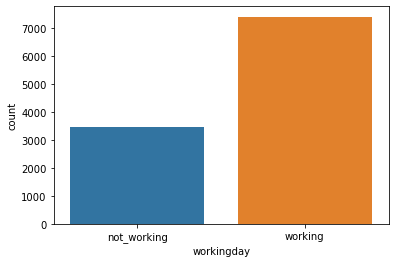

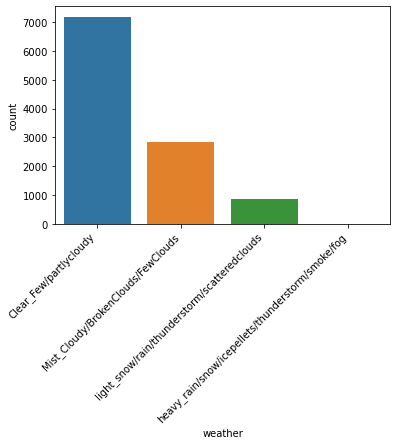

In [17]:
#plotting a countplot for the categorical variables
for i in cat_vars:
    if i != 'weather':
        sns.countplot(x=train_viz[i],data=train_viz)
        plt.show()
    else:
        plot=sns.countplot(x=train_viz['weather'],data=train_viz)
        plt.setp(plot.get_xticklabels(),rotation=45,ha='right')
        plt.show()
    

### Inference Based on the plots:

1) From the first plot we can see that, The demand of bikes has been more or less constant season wise. We can conclude that season is not a major decision factor to rent a bike.

2) From the holiday graph, we can fairly conclude that majority of the bikes have been rented when it isn't a holiday.The count for people renting bike on a holiday is way lesser.

3) The difference between the two categories in holiday is larger than working graph. Due to weekends coming under not-working it can be said, that people also rented bikes on weekends for recreational purposes.However the main motivation to rent a bike is Work.

4) While we never saw the season playing a strong impact on the number of bikes rented, we see the weather being one of the most important factors to rent a bike or not.The total count of the dataset is 10886 out of which **7192** were rented when the weather is **clear and pleasant**.

**2834** bikes were rented when the weather showed signs of **mist and clouds.859** rented bikes when there was **light rain or snow or scatter clouds with thunderstorm**. And only **1** person rented a bike when the weather has been rather rough like **heavy rain or snowfall ,thunderstorms, snow and fog**

**In summary,the two main reasons people have rented bikes is when they had to work accompanied with Good-Bearable weather**

### Bivariate Analysis Of the variables

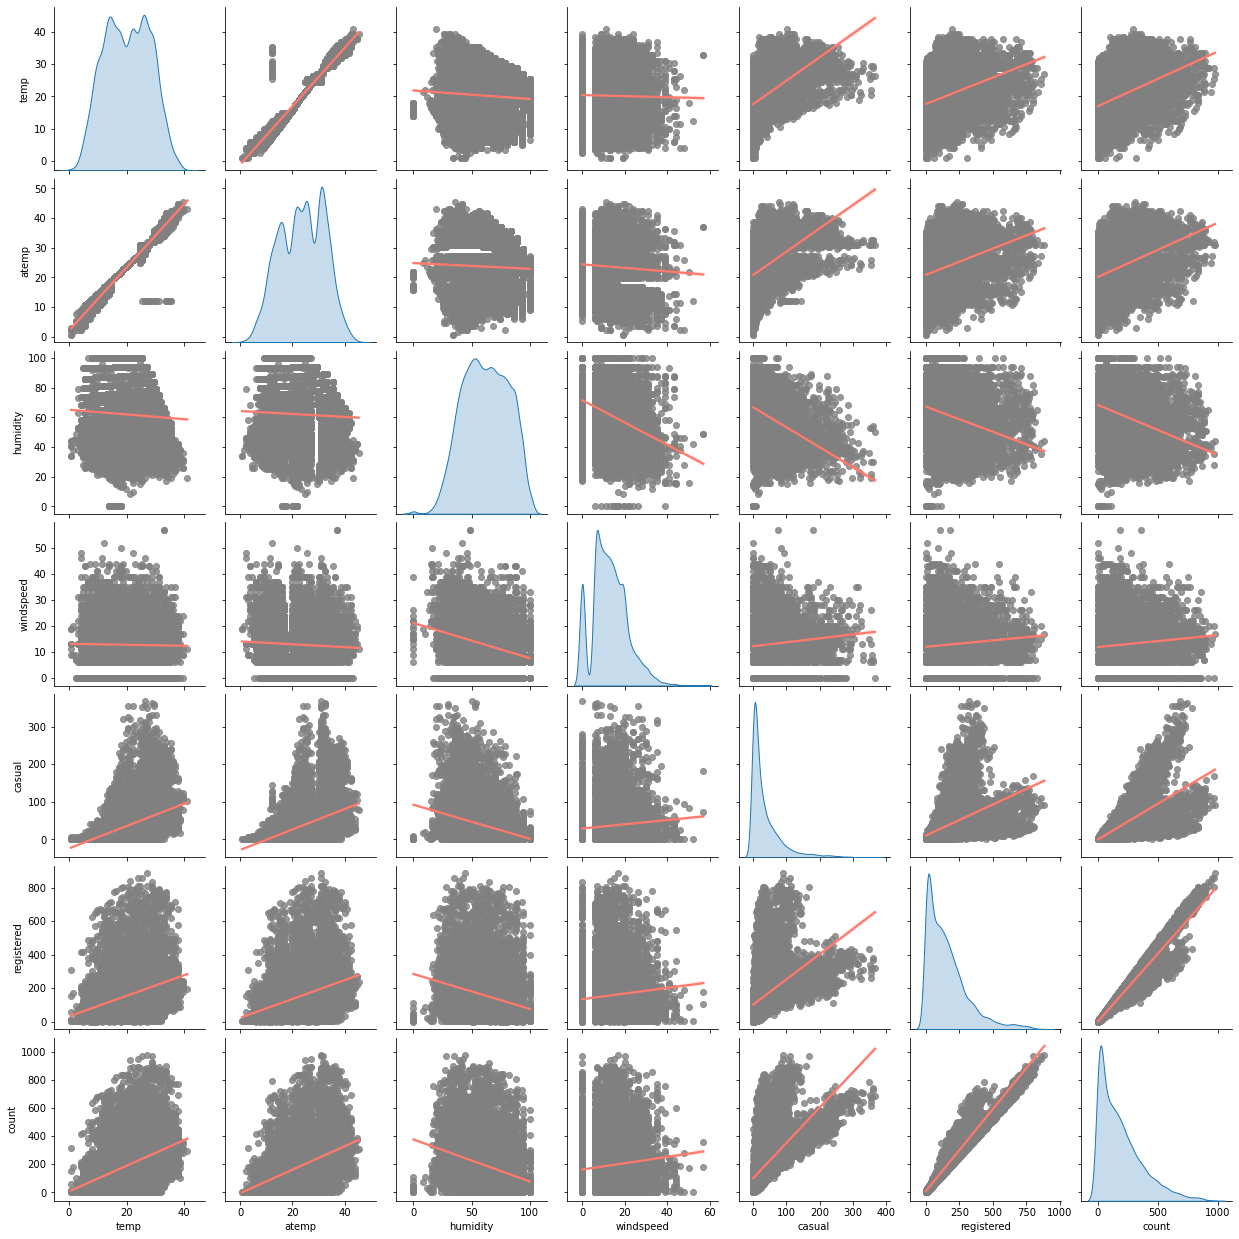

In [18]:
#pair plot of the data set 

sns.pairplot(train_viz,diag_kind="kde",kind='reg',plot_kws={'color':'xkcd:salmon','scatter_kws':{'color':'gray'}})

### Interpretation:

1) The variable **temperature** is linear with **atemp** i.e is the normalised feeling of temperature.There is an ever so slight negative correlation between **temp** Vs **humidity** and almost constant relation with **windspeed**. However, **temp** seems to have roughly linear relation with **casual and registered bikers** as well as with the **count per hour**

2) There is no visual correlation between **atemp** Vs **humidity** but a slight negative correlation with a small slope with **windspeed**.It has a roughly linear relationship with **casual and registered bikers** as well as with the **count**

3) **humidity** shows a fair negative correlation with **windspeed,casual,registered bikers and the count**.We can failry infer that when the humidity increases, people prefer not to rent a bike.

4) **windspeed** on the other hand shows positive correlation with **casual, registered and count**.We can say that windspeed can be one of the low level factors why people can rent a bike on a particular day.

5) **casual and registered** have a positive correlation with **count per hour**.

It is Important to note that, the relationship between atmospheric variables are not important for this study rather it is important to analyse how these variables are affecting the casual,registered and count variables.

<AxesSubplot:xlabel='season', ylabel='casual'>

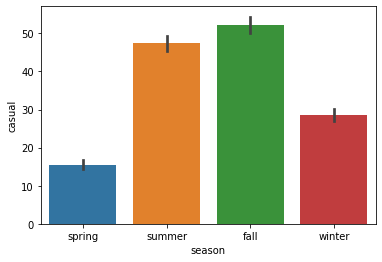

In [19]:
sns.barplot(x='season',y='casual',data=train_viz)

<AxesSubplot:xlabel='holiday', ylabel='casual'>

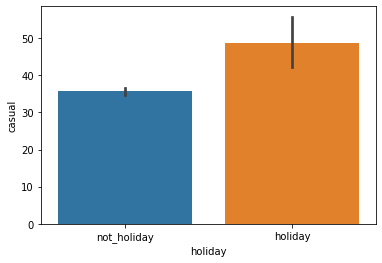

In [20]:
sns.barplot(x='holiday',y='casual',data=train_viz)

<AxesSubplot:xlabel='workingday', ylabel='casual'>

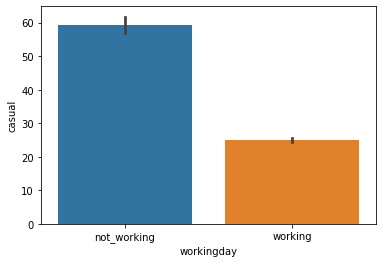

In [21]:
sns.barplot(x='workingday',y='casual',data=train_viz)

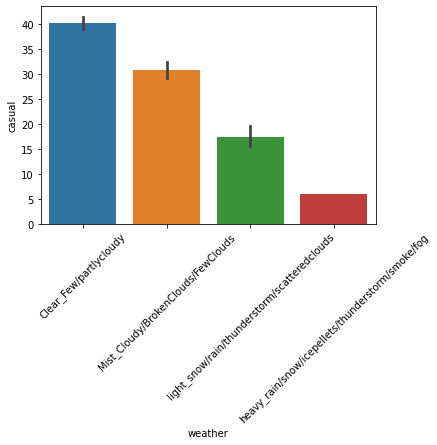

In [22]:
sns.barplot(x='weather',y='casual',data=train_viz)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='season', ylabel='registered'>

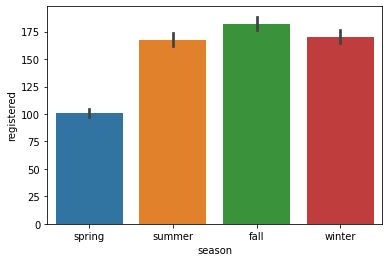

In [23]:
sns.barplot(x='season',y='registered',data=train_viz)

<AxesSubplot:xlabel='holiday', ylabel='registered'>

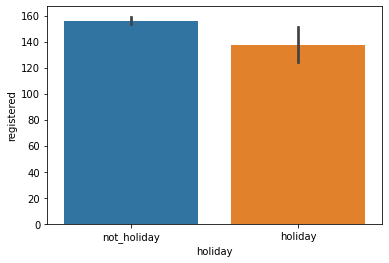

In [24]:
sns.barplot(x='holiday',y='registered',data=train_viz)

<AxesSubplot:xlabel='workingday', ylabel='registered'>

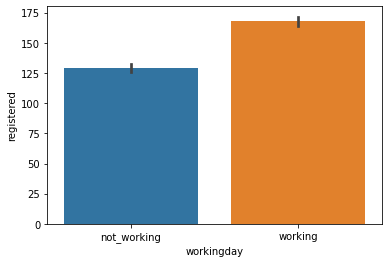

In [25]:
sns.barplot(x='workingday',y='registered',data=train_viz)

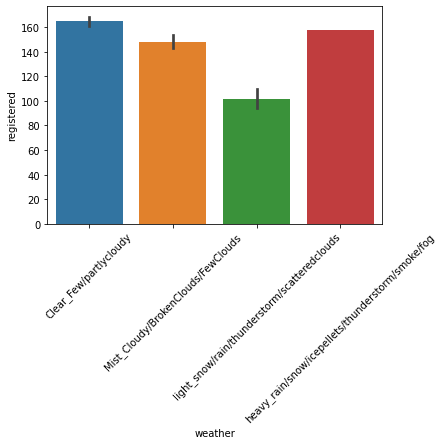

In [26]:
sns.barplot(x='weather',y='registered',data=train_viz)
plt.xticks(rotation=45)
plt.show()

### Conclusion:

The purpose of plotting these graphs was to understand if the reasons for casual and registered bikers was different or not.
Turns out these types of bikers did have different reasons for renting a bike.

PLEASE NOTE: The number of registered bikers is greater than casual. SO we arent comparing the count here but trying to infer the behaviour of the type of customers.

1) In terms of season, We have casual bikers picking two seasons significantly : Summer and Fall
   While as for registered bikers, Summer , fall and winter are fairly similar with a dip seen in spring
   
2) In terms of Holiday,We see more casual bikers on a holiday and Registered bikers more on when it is not a holiday

3) In terms of Working Day,we see more registered bikers on a working day and lesser casual bikers

4) In terms of weather, We see more significant choices for casual bikers i.e Clear weather, Maybe Cloudy and little snow or rainfall but in case of registered bikers, we see them less on days when the weather is little snow/rain but there are quite many registered bikers on a heavy storm day 



#### Plotting the count by hour for a specific year between 2011 and 2012

In [27]:
def plot_by_hour(data,agg_attr,year=None,agg='sum'):
    dd=data
    if year:
        dd=dd[dd.datetime.dt.year==year]
        
        dd.loc[:,('hour')]=dd.datetime.dt.hour
        
        by_hour=dd.groupby(['hour',agg_attr])['count'].agg(agg).unstack()
        return by_hour.plot(kind='bar',ylim=(0,80000),figsize=(15,5),width=0.9,title='Year ={0}'.format(year))

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:title={'center':'Year =2011'}, xlabel='hour'>

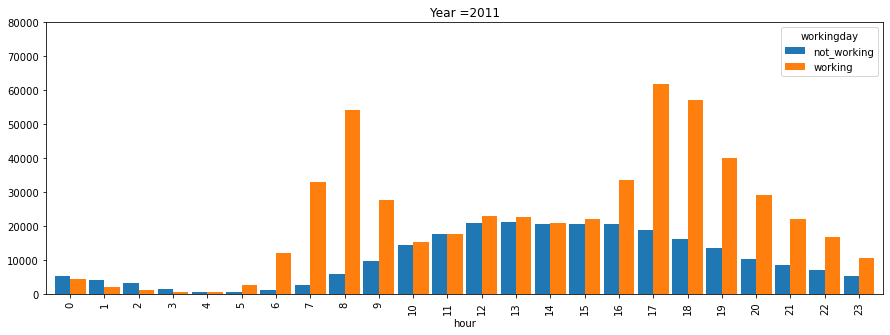

In [28]:
plot_by_hour(train_viz,'workingday',year=2011)


### Summary for 2011 based on Hour

1) The Renting of bikes serves a great purpose for working people.This is seen in the graph above.We can not only see the difference between working day or not working day, we also obtain the hours where the number of rents is maximum.The maximum number of rents in the morning is 8 am , which is the usual Reporting time. We then see the number of rents dipping and increasing again between 5-6pm which is the usual Checking Out time. This is followed by a steady dip as we move towards midnight.

D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\ANACONDA\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:title={'center':'Year =2012'}, xlabel='hour'>

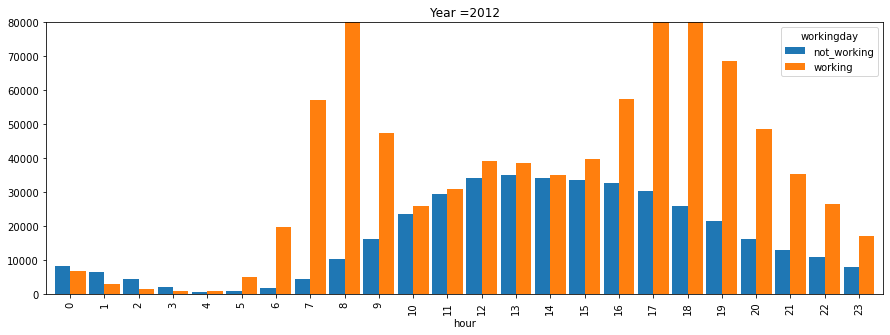

In [29]:
plot_by_hour(train_viz,'workingday',year=2012)


### Summary for 2012 based on hour

In comparison to 2011, we can see a significant rise in the number of rents in 2012.We shall visualise this difference better in another graph. Here we get more or else the same result with just a change in the amount of rents increasing. 8 am in the morning and 5pm and 6pm.

In [30]:
#plotting the count for each month and hour in years 2011 and 2012

def plot_by_year(data,agg_attr,title):
    #extracting required fields
    dd=train_viz.copy()
    
    dd['year']=dd.datetime.dt.year
    dd['month']=dd.datetime.dt.month
    dd['hour']=dd.datetime.dt.hour
    
    by_year=dd.groupby([agg_attr,'year'])['count'].agg('sum').unstack()
    by_year.plot(kind='bar',width=0.9,figsize=(15,5),title=title)
    

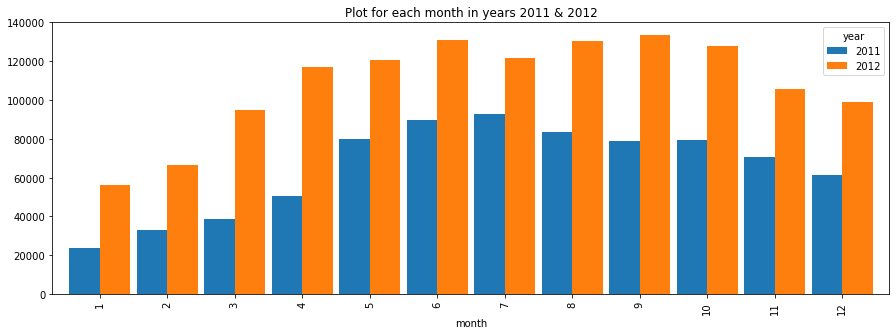

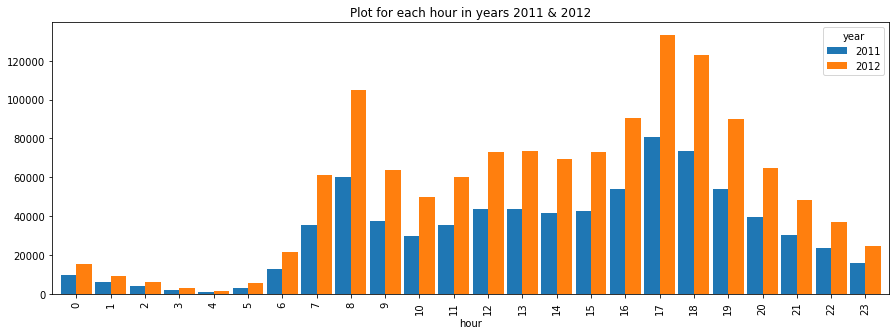

In [31]:
plot_by_year(train_viz,'month','Plot for each month in years 2011 & 2012')
plot_by_year(train_viz,'hour','Plot for each hour in years 2011 & 2012')

### Conclusion:

1) We can see that in 2011, the highest amount of rents took place in September. This result can also be seen in Season, where we see the highest amount of rents in 'Fall'.

2) The plot with the hour gives a similar result like the plot_by_hour. 8 am and 5 pm showing highest amount of rents.

In [27]:
#!pip install pandas-profiling


In [57]:
import pandas_profiling

In [58]:
train_viz.profile_report()

## Checking for Outliers

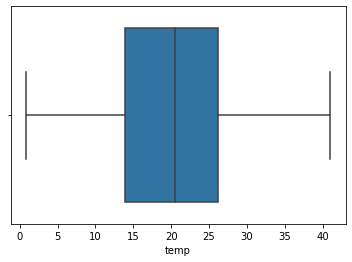

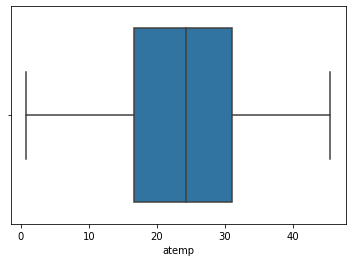

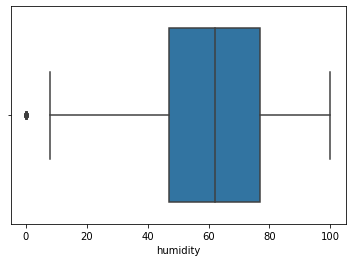

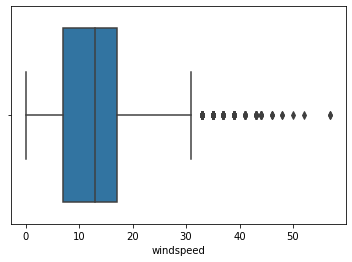

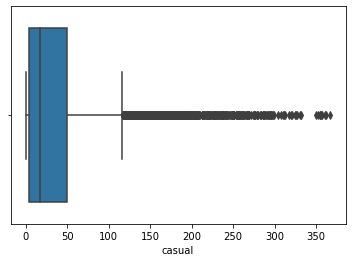

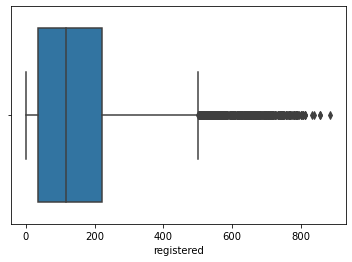

In [72]:
for i in num_vars:
    #used to initiate a figure for each column
    plt.figure()
    sns.boxplot(x=i,data=num_vars)

<AxesSubplot:xlabel='count'>

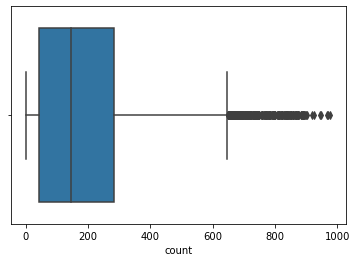

In [73]:
sns.boxplot(x='count',data=train)

We can see outliers in humidity, windspeed, casual and registered.
This means that we have few data points that were way beyond the max data point.

In Humidity, we can a single data point that is way below the minimum value for humidity.
In windspeed, we have several instances where the windspeed was way above the max point
In casual,registered and count we have significant amount of outliers.It means that, in a single hour, we have many instances where the number of people who rented a bike are above the maximum value.

we will try to treat these outliers using the IQR method.

In [122]:
# function which returns the outlier free data 
def outlier_removal(data,cols):
    Q1=data[cols].quantile(0.25)
    Q3=data[cols].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1 - 1.5*IQR
    upper_limit=Q3 + 1.5*IQR
    
    outlier_data=data[~((data[cols] > upper_limit)|(data[cols] < lower_limit))]
    return outlier_data


### Storing the outlier free data for the necessary variables

In [154]:
humidity_outlier=outlier_removal(train,'humidity')


In [127]:
windspeed_outlier=outlier_removal(train,'windspeed')

In [128]:
casual_outlier=outlier_removal(train,'casual')

In [129]:
registered_outlier=outlier_removal(train,'registered')

### Merging it with the copy of the original dataset

In [143]:
train_outlier_free=train.copy()
train_outlier_free.shape

(10886, 12)

In [149]:
train_outlier_free['humidity']=humidity_outlier['humidity']


In [150]:
train_outlier_free['windspeed']=windspeed_outlier['windspeed']

In [151]:
train_outlier_free['casual']=casual_outlier['casual']

In [152]:
train_outlier_free['registered']=registered_outlier['registered']

### Imputing the mean inplace of newly created missing values


In [155]:
train_outlier_free['humidity'] = train_outlier_free['humidity'].fillna(train_outlier_free['humidity'].mean())

In [157]:
train_outlier_free['windspeed'] = train_outlier_free['windspeed'].fillna(train_outlier_free['windspeed'].mean())

In [166]:
train_outlier_free['casual'] = train_outlier_free['casual'].fillna(train_outlier_free['casual'].median())

In [159]:
train_outlier_free['registered'] = train_outlier_free['registered'].fillna(train_outlier_free['registered'].mean())

In [167]:
train_outlier_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  float64       
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1020.7 KB


In [161]:
from scipy.stats import norm

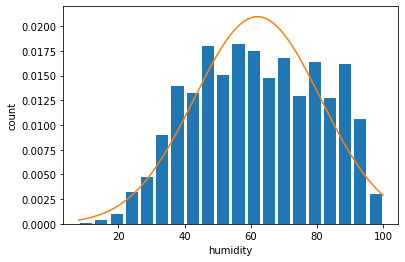

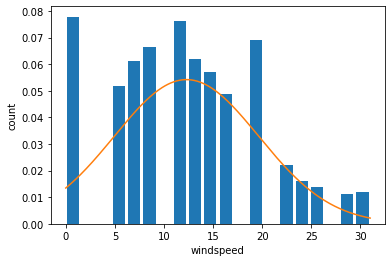

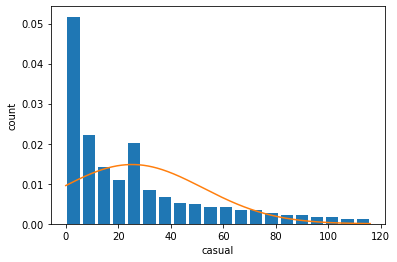

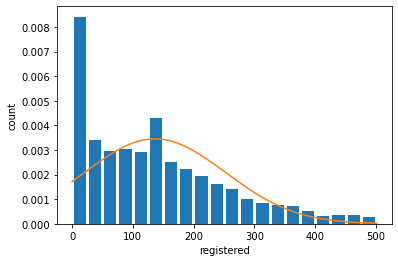

In [169]:
#making a function to see if there is any distortion in the data after outlier and missing value treatment

cols=['humidity','windspeed','casual','registered']
for i in cols:
    plt.figure()
    plt.hist(train_outlier_free[i],bins=20,rwidth=0.8,density=True)
    
    plt.xlabel(i)
    plt.ylabel('count')
    
    rng=np.arange(train_outlier_free[i].min(),train_outlier_free[i].max(),0.1)
    plt.plot(rng,norm.pdf(rng,train_outlier_free[i].mean(),train_outlier_free[i].std()))
    

### Conclusion

In Comparsion with the original histogram, there is no much change in the distribution of the data for these variables.